In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load and prepare the data
file_path = "C:\\Users\\mmr257\\Downloads\\Times Rankings 2024 - Sheet1.csv"
data = pd.read_csv(file_path)
data['International Students'] = data['International Students'].str.rstrip('%').astype(float) / 100

# Convert the Female:Male Ratio
def convert_gender_ratio(ratio):
    if pd.isna(ratio) or ':' not in str(ratio):
        return ratio
    parts = ratio.split(':')
    return float(parts[0]) / (float(parts[0]) + float(parts[1]))

data['Female:Male Ratio'] = data['Female:Male Ratio'].apply(convert_gender_ratio)

# Convert ranges in 'Overall Score' to average or drop them
def handle_score_ranges(score):
    if pd.isna(score):
        return None
    if '–' in str(score):
        low, high = score.split('–')
        return (float(low) + float(high)) / 2
    return float(score)

data['Overall Score'] = data['Overall Score'].apply(handle_score_ranges)
data.dropna(subset=['Overall Score'], inplace=True)  # Drop any remaining NaNs

# Fill remaining NaN values in data
data.fillna(data.mean(numeric_only=True), inplace=True)

# Preparing the data for regression
X = data[['Teaching Score', 'Research Environment Score', 'Research Quality Score',
          'Industry Score', 'International Outlook Score', 'No. of students per staff',
          'International Students', 'Female:Male Ratio']]
y = data['Overall Score']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Model evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

# Output results
print("Coefficients:\n", coefficients)
print("R^2 Score:", r2)
print("Mean Squared Error:", mse)

#Negative Female:male Ratio?

Coefficients:
                              Coefficient
Teaching Score                  0.314577
Research Environment Score      0.272819
Research Quality Score          0.309121
Industry Score                  0.036515
International Outlook Score     0.075166
No. of students per staff       0.029384
International Students          1.142935
Female:Male Ratio              -1.260678
R^2 Score: 0.9970772856332207
Mean Squared Error: 0.9505519726607221


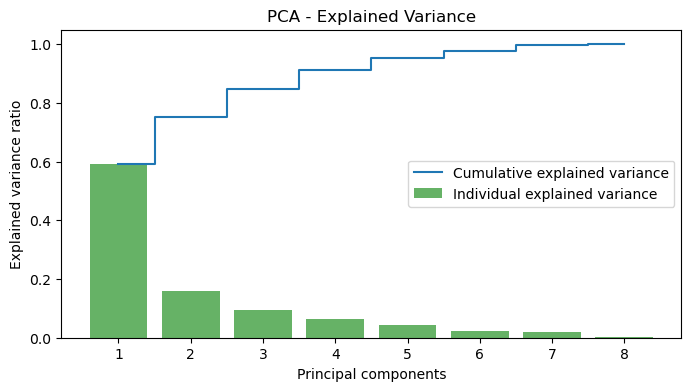

                                  PC1       PC2       PC3
Teaching Score               0.409921  0.257824 -0.090147
Research Environment Score   0.416628  0.084787 -0.231235
Research Quality Score       0.389631  0.107771 -0.365985
Industry Score               0.378810 -0.069682 -0.425804
International Outlook Score  0.387908 -0.242372  0.321410
No. of students per staff   -0.191839 -0.619222 -0.479324
International Students       0.363327 -0.110484  0.513563
Female:Male Ratio           -0.209274  0.674893 -0.162318


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Assuming the data preparation steps have been done and 'data' DataFrame is ready
X = data[['Teaching Score', 'Research Environment Score', 'Research Quality Score',
          'Industry Score', 'International Outlook Score', 'No. of students per staff',
          'International Students', 'Female:Male Ratio']]

# Standardizing the data for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_

# Plotting the explained variance by each principal component
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, color='g', label='Individual explained variance')
plt.step(range(1, len(np.cumsum(explained_variance)) + 1), np.cumsum(explained_variance), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('PCA - Explained Variance')
plt.show()

# Show loadings for the first three components
loadings = pd.DataFrame(pca.components_[:3], columns=X.columns).T
loadings.columns = ['PC1', 'PC2', 'PC3']
print(loadings)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

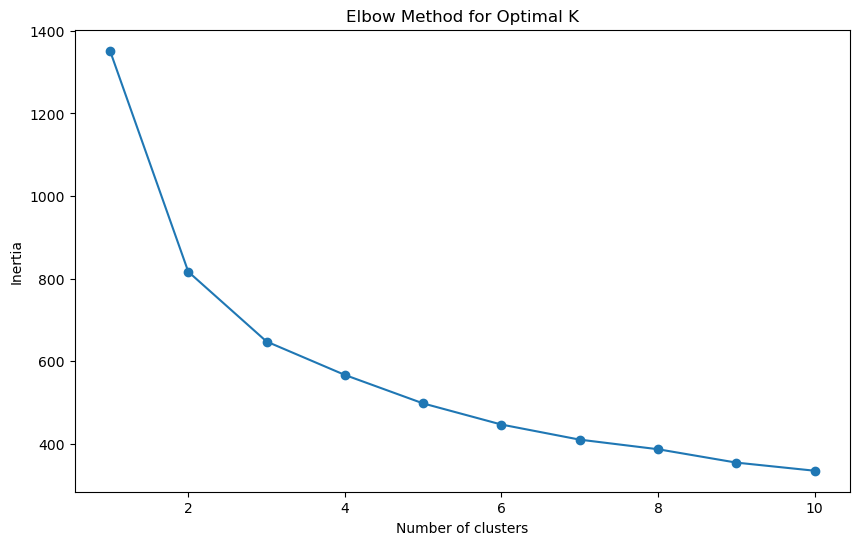

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mmr257\AppData\Local\Temp\ipykernel_3956\94504639.py:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = data.groupby('Cluster').mean()


              Rank   No. of students per staff  International Students  \
Cluster                                                                  
0         17.033333                  10.296667                0.254333   
1         67.676471                  13.579412                0.137794   
2        130.309859                  16.719718                0.057746   

         Female:Male Ratio  Overall Score  Teaching Score  \
Cluster                                                     
0                 0.501297      84.186667       77.330000   
1                 0.507549      56.157353       44.179412   
2                 0.574225      38.346479       30.805634   

         Research Environment Score  Research Quality Score  Industry Score  \
Cluster                                                                       
0                         80.000000               95.383333       88.086667   
1                         38.427941               80.986765       76.673529   
2      

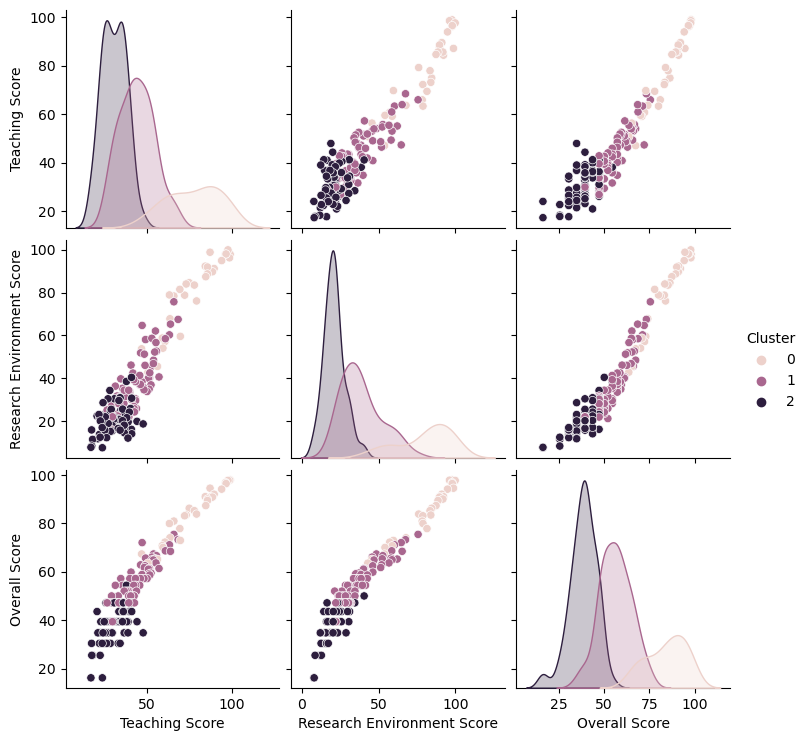

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data has been standardized if needed and is stored in 'X_scaled'
# Elbow Method to determine the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Apply K-means clustering with the chosen number of clusters, for example, k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['Cluster'] = clusters  # append cluster information to the original DataFrame

# Analyze the clusters
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)

# Visualize the clusters for specific variables if needed
sns.pairplot(data, hue='Cluster', vars=['Teaching Score', 'Research Environment Score', 'Overall Score'])
plt.show()


In [7]:
import pandas as pd

# Load and prepare the data
file_path = "C:\\Users\\mmr257\\Downloads\\Times Rankings 2024 - Sheet1.csv"
data = pd.read_csv(file_path)

# Handling the Female:Male Ratio
def convert_gender_ratio(ratio):
    if pd.isna(ratio) or ':' not in str(ratio):
        return None  # Return None for missing or malformed data
    female, male = map(int, ratio.split(' : '))
    return female / (female + male)  # Convert to a proportion of females

data['Female:Male Ratio'] = data['Female:Male Ratio'].apply(convert_gender_ratio)

# Handle missing data in 'Overall Score'
def handle_score_ranges(score):
    if pd.isna(score):
        return None
    if '–' in str(score):
        low, high = score.split('–')
        return (float(low) + float(high)) / 2
    return float(score)

data['Overall Score'] = data['Overall Score'].apply(handle_score_ranges)
data.dropna(subset=['Overall Score', 'Female:Male Ratio'], inplace=True)  # Drop rows with NaNs in these columns

# Check for anomalies in the converted data
print(data[['Female:Male Ratio']].describe())

# Continue with your existing regression analysis setup


       Female:Male Ratio
count         164.000000
mean            0.534451
std             0.081709
min             0.240000
25%             0.497500
50%             0.540000
75%             0.580000
max             0.760000


In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load and prepare the data
file_path = "C:\\Users\\mmr257\\Downloads\\Times Rankings 2024 - Sheet1.csv"
data = pd.read_csv(file_path)

# Convert percentage strings to floats
def convert_percentage(percentage_str):
    if pd.isna(percentage_str):
        return None
    return float(percentage_str.strip('%')) / 100

data['International Students'] = data['International Students'].apply(convert_percentage)

# Convert the Female:Male Ratio
def convert_gender_ratio(ratio):
    if pd.isna(ratio) or ':' not in str(ratio):
        return None
    parts = ratio.split(':')
    return float(parts[0]) / (float(parts[0]) + float(parts[1]))

data['Female:Male Ratio'] = data['Female:Male Ratio'].apply(convert_gender_ratio)

# Convert ranges in 'Overall Score' to average
def handle_score_ranges(score):
    if pd.isna(score) or '–' in str(score):
        return None
    if '–' in str(score):
        low, high = score.split('–')
        return (float(low) + float(high)) / 2
    return float(score)

data['Overall Score'] = data['Overall Score'].apply(handle_score_ranges)
data.dropna(subset=['Overall Score', 'Female:Male Ratio', 'International Students'], inplace=True)  # Drop rows with NaNs in these columns

# Ensure all data is numeric and fill any remaining NaN values
data.fillna(data.mean(), inplace=True)

# Preparing the data for regression
X = data[['Teaching Score', 'Research Environment Score', 'Research Quality Score', 'Industry Score', 'International Outlook Score', 'No. of students per staff', 'International Students', 'Female:Male Ratio']]
y = data['Overall Score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Coefficients:\n", pd.DataFrame(model.coef_, X.columns, columns=['Coefficient']))

# Check correlations
correlations = data.corr()
print("Correlations with Overall Score:\n", correlations['Overall Score'])


R^2 Score: 0.9999885308031986
Mean Squared Error: 0.0020964232037093346
Coefficients:
                              Coefficient
Teaching Score                  0.296736
Research Environment Score      0.288351
Research Quality Score          0.299347
Industry Score                  0.039846
International Outlook Score     0.075010
No. of students per staff       0.000114
International Students          0.053657
Female:Male Ratio               0.028050
Correlations with Overall Score:
 Rank                          -0.980628
No. of students per staff     -0.281241
International Students         0.526270
Female:Male Ratio             -0.218776
Overall Score                  1.000000
Teaching Score                 0.966131
Research Environment Score     0.973611
Research Quality Score         0.733345
Industry Score                 0.524605
International Outlook Score    0.677872
Name: Overall Score, dtype: float64


C:\Users\mmr257\AppData\Local\Temp\ipykernel_3956\1821983993.py:40: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)
C:\Users\mmr257\AppData\Local\Temp\ipykernel_3956\1821983993.py:60: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()
